## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.112968  0.921156 -1.100948 -1.500959  1.040609  0.280085
1  1.340251 -0.724491  0.074505  0.685397  1.141954  0.876180
2 -0.677209 -1.364208 -0.161868 -0.008397  0.032903 -1.132472
3 -0.267565  0.288107 -1.284660 -1.393814 -0.552076 -0.462064
4  0.280276 -1.795768  0.471230  0.642803  1.500620 -0.423039


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9954203	total: 68.8ms	remaining: 1m 8s
1:	learn: 0.9868548	total: 69.4ms	remaining: 34.7s
2:	learn: 0.9755656	total: 70.1ms	remaining: 23.3s
3:	learn: 0.9645998	total: 70.8ms	remaining: 17.6s
4:	learn: 0.9569411	total: 71.3ms	remaining: 14.2s
5:	learn: 0.9470812	total: 71.8ms	remaining: 11.9s
6:	learn: 0.9369259	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9279003	total: 72.9ms	remaining: 9.04s
8:	learn: 0.9195552	total: 73.5ms	remaining: 8.09s
9:	learn: 0.9112926	total: 73.9ms	remaining: 7.32s
10:	learn: 0.9030226	total: 74.4ms	remaining: 6.69s
11:	learn: 0.8930455	total: 74.9ms	remaining: 6.17s
12:	learn: 0.8836692	total: 75.4ms	remaining: 5.73s
13:	learn: 0.8745504	total: 75.8ms	remaining: 5.34s
14:	learn: 0.8675454	total: 76.4ms	remaining: 5.01s
15:	learn: 0.8589575	total: 76.8ms	remaining: 4.72s
16:	learn: 0.8501657	total: 77.3ms	remaining: 4.47s
17:	learn: 0.8415006	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8338429	total: 78.1ms	remaining

84:	learn: 0.4618974	total: 109ms	remaining: 1.17s
85:	learn: 0.4578329	total: 110ms	remaining: 1.17s
86:	learn: 0.4547004	total: 110ms	remaining: 1.16s
87:	learn: 0.4508336	total: 111ms	remaining: 1.15s
88:	learn: 0.4471704	total: 111ms	remaining: 1.14s
89:	learn: 0.4438481	total: 112ms	remaining: 1.13s
90:	learn: 0.4401610	total: 112ms	remaining: 1.12s
91:	learn: 0.4362438	total: 113ms	remaining: 1.11s
92:	learn: 0.4325558	total: 113ms	remaining: 1.1s
93:	learn: 0.4284695	total: 114ms	remaining: 1.1s
94:	learn: 0.4252287	total: 114ms	remaining: 1.09s
95:	learn: 0.4214809	total: 115ms	remaining: 1.08s
96:	learn: 0.4185260	total: 115ms	remaining: 1.07s
97:	learn: 0.4152490	total: 116ms	remaining: 1.06s
98:	learn: 0.4116699	total: 116ms	remaining: 1.06s
99:	learn: 0.4080762	total: 117ms	remaining: 1.05s
100:	learn: 0.4050943	total: 117ms	remaining: 1.04s
101:	learn: 0.4018801	total: 118ms	remaining: 1.04s
102:	learn: 0.3990223	total: 118ms	remaining: 1.03s
103:	learn: 0.3953640	total: 1

242:	learn: 0.1477535	total: 187ms	remaining: 583ms
243:	learn: 0.1471832	total: 188ms	remaining: 582ms
244:	learn: 0.1465940	total: 188ms	remaining: 580ms
245:	learn: 0.1456539	total: 189ms	remaining: 578ms
246:	learn: 0.1451621	total: 189ms	remaining: 576ms
247:	learn: 0.1443394	total: 189ms	remaining: 574ms
248:	learn: 0.1433026	total: 190ms	remaining: 572ms
249:	learn: 0.1425043	total: 190ms	remaining: 570ms
250:	learn: 0.1414967	total: 190ms	remaining: 568ms
251:	learn: 0.1410852	total: 191ms	remaining: 567ms
252:	learn: 0.1402151	total: 191ms	remaining: 565ms
253:	learn: 0.1396091	total: 192ms	remaining: 563ms
254:	learn: 0.1386595	total: 192ms	remaining: 562ms
255:	learn: 0.1379787	total: 193ms	remaining: 560ms
256:	learn: 0.1374365	total: 193ms	remaining: 559ms
257:	learn: 0.1366460	total: 194ms	remaining: 557ms
258:	learn: 0.1359715	total: 194ms	remaining: 555ms
259:	learn: 0.1354358	total: 195ms	remaining: 554ms
260:	learn: 0.1349716	total: 195ms	remaining: 552ms
261:	learn: 

462:	learn: 0.0503986	total: 292ms	remaining: 338ms
463:	learn: 0.0500976	total: 292ms	remaining: 338ms
464:	learn: 0.0498268	total: 293ms	remaining: 337ms
465:	learn: 0.0495513	total: 293ms	remaining: 336ms
466:	learn: 0.0493002	total: 294ms	remaining: 335ms
467:	learn: 0.0490661	total: 294ms	remaining: 334ms
468:	learn: 0.0488375	total: 294ms	remaining: 333ms
469:	learn: 0.0486436	total: 295ms	remaining: 333ms
470:	learn: 0.0484237	total: 295ms	remaining: 332ms
471:	learn: 0.0482369	total: 296ms	remaining: 331ms
472:	learn: 0.0480252	total: 297ms	remaining: 330ms
473:	learn: 0.0478452	total: 297ms	remaining: 330ms
474:	learn: 0.0477789	total: 298ms	remaining: 329ms
475:	learn: 0.0477134	total: 298ms	remaining: 328ms
476:	learn: 0.0474069	total: 298ms	remaining: 327ms
477:	learn: 0.0473423	total: 299ms	remaining: 326ms
478:	learn: 0.0470426	total: 299ms	remaining: 326ms
479:	learn: 0.0469789	total: 300ms	remaining: 325ms
480:	learn: 0.0466859	total: 300ms	remaining: 324ms
481:	learn: 

629:	learn: 0.0285589	total: 369ms	remaining: 217ms
630:	learn: 0.0284867	total: 370ms	remaining: 216ms
631:	learn: 0.0284476	total: 370ms	remaining: 215ms
632:	learn: 0.0283533	total: 370ms	remaining: 215ms
633:	learn: 0.0282825	total: 371ms	remaining: 214ms
634:	learn: 0.0282444	total: 371ms	remaining: 213ms
635:	learn: 0.0281377	total: 372ms	remaining: 213ms
636:	learn: 0.0281001	total: 372ms	remaining: 212ms
637:	learn: 0.0280039	total: 372ms	remaining: 211ms
638:	learn: 0.0279300	total: 373ms	remaining: 211ms
639:	learn: 0.0278940	total: 373ms	remaining: 210ms
640:	learn: 0.0278580	total: 374ms	remaining: 209ms
641:	learn: 0.0277160	total: 374ms	remaining: 209ms
642:	learn: 0.0276230	total: 375ms	remaining: 208ms
643:	learn: 0.0275881	total: 375ms	remaining: 207ms
644:	learn: 0.0274976	total: 376ms	remaining: 207ms
645:	learn: 0.0274713	total: 376ms	remaining: 206ms
646:	learn: 0.0274012	total: 376ms	remaining: 205ms
647:	learn: 0.0273755	total: 377ms	remaining: 205ms
648:	learn: 

864:	learn: 0.0152920	total: 474ms	remaining: 74ms
865:	learn: 0.0152857	total: 474ms	remaining: 73.4ms
866:	learn: 0.0152047	total: 475ms	remaining: 72.8ms
867:	learn: 0.0151882	total: 475ms	remaining: 72.3ms
868:	learn: 0.0151305	total: 476ms	remaining: 71.7ms
869:	learn: 0.0150529	total: 476ms	remaining: 71.1ms
870:	learn: 0.0150467	total: 477ms	remaining: 70.6ms
871:	learn: 0.0150048	total: 477ms	remaining: 70ms
872:	learn: 0.0149367	total: 477ms	remaining: 69.5ms
873:	learn: 0.0149102	total: 478ms	remaining: 68.9ms
874:	learn: 0.0148981	total: 478ms	remaining: 68.3ms
875:	learn: 0.0148191	total: 479ms	remaining: 67.8ms
876:	learn: 0.0148071	total: 479ms	remaining: 67.2ms
877:	learn: 0.0147253	total: 480ms	remaining: 66.7ms
878:	learn: 0.0146449	total: 480ms	remaining: 66.1ms
879:	learn: 0.0145734	total: 480ms	remaining: 65.5ms
880:	learn: 0.0145616	total: 481ms	remaining: 64.9ms
881:	learn: 0.0145308	total: 481ms	remaining: 64.4ms
882:	learn: 0.0145192	total: 482ms	remaining: 63.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

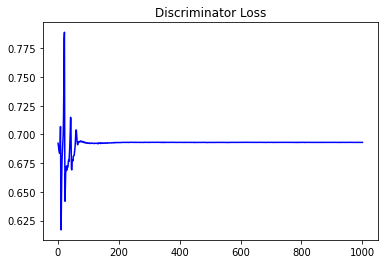

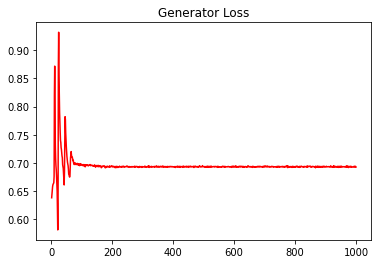

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08256347840886603


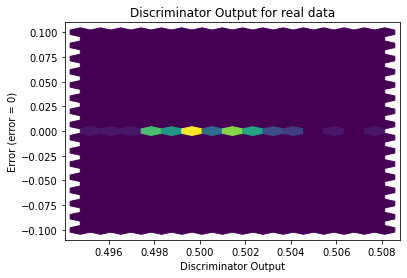

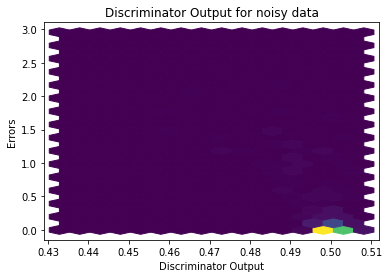

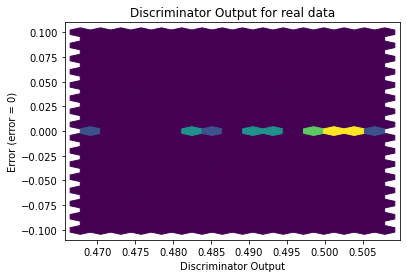

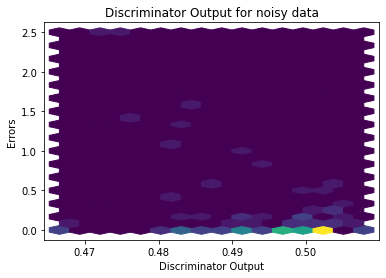

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


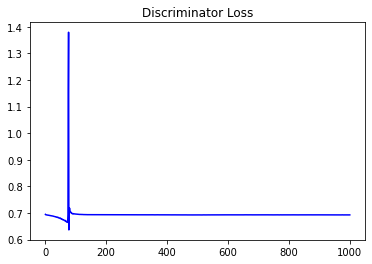

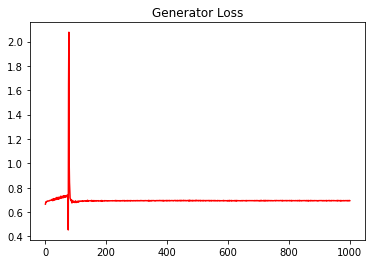

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08121823013407474


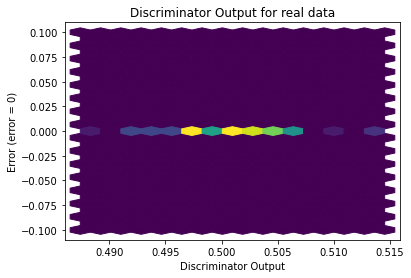

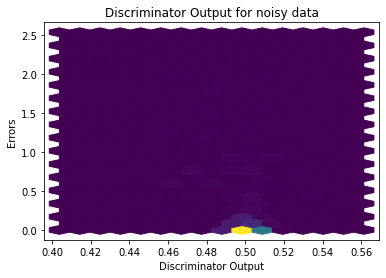

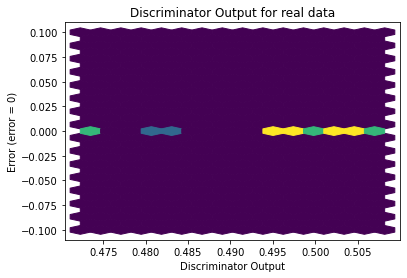

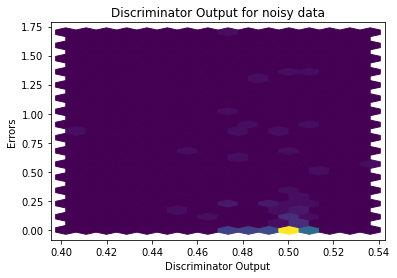

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0105]], requires_grad=True)
